# A6 Proj

## Contents
### Notebook Setup
### Data Cleaning

### Merge Datasets



## Notebook Setup

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


In [2]:
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Notebook settings
%matplotlib inline
path = r'D:\2021 CareerFoundry Course\Immersion\A6 Project'

In [4]:
cov = pd.read_csv(os.path.join(path, '02 Data', 'Raw', 'owid-covid-data.csv'), index_col = 0)


In [5]:
cov.reset_index(inplace = True)

## Data Cleaning

In [6]:
cov.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.263920e+05,2.260120e+05,2.248130e+05,2.070280e+05,206938.000000,205754.000000,225360.000000,224980.000000,223786.000000,206009.000000,...,144346.000000,95139.000000,172018.000000,220402.000000,188559.000000,2.391390e+05,7.993000e+03,7993.000000,8044.000000,7993.000000
mean,4.750222e+06,1.218103e+04,1.221413e+04,7.617329e+04,133.334772,133.971463,64945.002299,186.023241,186.355609,711.945620,...,32.814174,50.897762,3.088233,73.611678,0.724695,1.409363e+08,4.924283e+04,10.003981,14.240446,1385.309503
std,2.953404e+07,8.405142e+04,8.208388e+04,3.903455e+05,714.288665,699.966778,113242.553600,1154.574125,687.372866,994.468107,...,13.536525,31.874841,2.551518,7.446212,0.149600,6.927722e+08,1.356395e+05,13.417157,26.132429,1760.405524
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,4.931000e+03,0.000000e+00,5.429000e+00,1.170000e+02,0.000000,0.000000,1169.601000,0.000000,1.182000,31.559000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.960070e+05,4.600000e+01,0.660000,0.000000,33.626103
50%,5.501700e+04,4.800000e+01,8.800000e+01,1.253000e+03,1.000000,1.286000,11377.156000,6.453000,17.994000,225.475000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.270200e+03,7.580000,7.400000,837.862128
75%,5.656260e+05,9.140000e+02,1.085143e+03,1.030800e+04,13.000000,14.857000,77677.221750,92.371750,131.135750,1056.153000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.598380e+04,15.580000,19.502500,2182.992640
max,6.451908e+08,4.083952e+06,3.439392e+06,6.640837e+06,17733.000000,14859.143000,690003.538000,228872.025000,36421.827000,6387.625000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.240683e+06,76.550000,376.580000,10032.844512


In [124]:
cov

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,year_month
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,2,2020-02-01
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,2,2020-02-01
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,2,2020-02-01
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,2,2020-02-01
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,2,2020-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240166,ZWE,Africa,Zimbabwe,2022-11-30,259164.0,1271.0,181.571,5620.0,14.0,2.0,...,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2022,11,2022-11-01
240167,ZWE,Africa,Zimbabwe,2022-12-01,259164.0,NaN,NaN,5620.0,NaN,NaN,...,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2022,12,2022-12-01
240168,ZWE,Africa,Zimbabwe,2022-12-02,259164.0,NaN,NaN,5620.0,NaN,NaN,...,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2022,12,2022-12-01
240169,ZWE,Africa,Zimbabwe,2022-12-03,259164.0,NaN,NaN,5620.0,NaN,NaN,...,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2022,12,2022-12-01


In [7]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240171 entries, 0 to 240170
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    240171 non-null  object 
 1   continent                                   226653 non-null  object 
 2   location                                    240171 non-null  object 
 3   date                                        240171 non-null  object 
 4   total_cases                                 226392 non-null  float64
 5   new_cases                                   226012 non-null  float64
 6   new_cases_smoothed                          224813 non-null  float64
 7   total_deaths                                207028 non-null  float64
 8   new_deaths                                  206938 non-null  float64
 9   new_deaths_smoothed                         205754 non-null  float64
 

<AxesSubplot:xlabel='total_tests_per_thousand', ylabel='positive_rate'>

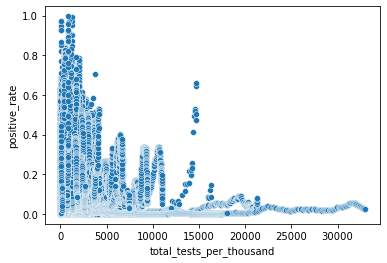

In [126]:
sns.scatterplot(data = cov, x='total_tests_per_thousand', y='positive_rate')

<AxesSubplot:xlabel='reproduction_rate', ylabel='total_deaths_per_million'>

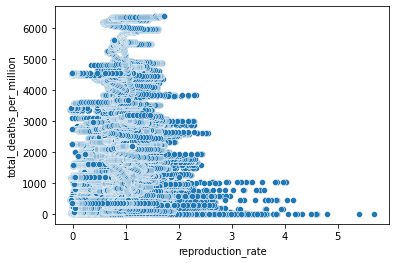

In [127]:
sns.scatterplot(data = cov, x='reproduction_rate', y='total_deaths_per_million')

### Data Types

In [8]:
# Convert Date to datetime
cov['date'] = cov['date'].astype('datetime64[ns]')

In [9]:
# Create a standalone year column
cov['year'] = cov['date'].dt.year

In [10]:
# Create a standalone month column
cov['month'] = cov['date'].dt.month

In [11]:
# Create yyyy-mm column
cov['year_month'] = cov['date'].dt.to_period('M')

In [12]:
cov['year_month'] = pd.to_datetime(cov.year.astype(str) + cov.month.astype(str), format='%Y%m')

In [13]:
cov.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,year_month
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,2,2020-02-01
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,2,2020-02-01


In [14]:
# Check data types
cov[['date','year_month','month','year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240171 entries, 0 to 240170
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        240171 non-null  datetime64[ns]
 1   year_month  240171 non-null  datetime64[ns]
 2   month       240171 non-null  int64         
 3   year        240171 non-null  int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 7.3 MB


In [15]:
# Check dates
cov[['date','year_month','month','year']]

,date,year_month,month,year
0,2020-02-24,2020-02-01,2,2020
1,2020-02-25,2020-02-01,2,2020
2,2020-02-26,2020-02-01,2,2020
3,2020-02-27,2020-02-01,2,2020
4,2020-02-28,2020-02-01,2,2020
...,...,...,...,...
240166,2022-11-30,2022-11-01,11,2022
240167,2022-12-01,2022-12-01,12,2022
240168,2022-12-02,2022-12-01,12,2022
240169,2022-12-03,2022-12-01,12,2022


In [16]:
cov.sort_values(by = 'date', ascending = False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,year_month
240170,ZWE,Africa,Zimbabwe,2022-12-04,259164.0,NaN,NaN,5620.0,NaN,NaN,...,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2022,12,2022-12-01
127237,LUX,Europe,Luxembourg,2022-12-04,307290.0,NaN,NaN,1165.0,0.0,1.000,...,82.25,0.916,647601.0,NaN,NaN,NaN,NaN,2022,12,2022-12-01
9114,ARG,South America,Argentina,2022-12-04,9739856.0,12609.0,1801.286,130034.0,9.0,1.286,...,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2022,12,2022-12-01
27264,BES,North America,Bonaire Sint Eustatius and Saba,2022-12-04,11555.0,0.0,1.571,38.0,0.0,0.000,...,77.79,NaN,27052.0,NaN,NaN,NaN,NaN,2022,12,2022-12-01
200225,OWID_SAM,NaN,South America,2022-12-04,65227098.0,25534.0,52367.857,1335920.0,64.0,140.429,...,NaN,NaN,436816679.0,NaN,NaN,NaN,NaN,2022,12,2022-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8048,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1,2020-01-01
137226,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,75.05,0.779,127504120.0,NaN,NaN,NaN,NaN,2020,1,2020-01-01
8047,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,76.67,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1,2020-01-01
137225,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,75.05,0.779,127504120.0,NaN,NaN,NaN,NaN,2020,1,2020-01-01


### Nulls

In [17]:
# Locate nulls, displaying all results
with pd.option_context('display.max_rows', None,):
    print(cov.isna().sum())

iso_code                                           0
continent                                      13518
location                                           0
date                                               0
total_cases                                    13779
new_cases                                      14159
new_cases_smoothed                             15358
total_deaths                                   33143
new_deaths                                     33233
new_deaths_smoothed                            34417
total_cases_per_million                        14811
new_cases_per_million                          15191
new_cases_smoothed_per_million                 16385
total_deaths_per_million                       34162
new_deaths_per_million                         34252
new_deaths_smoothed_per_million                35431
reproduction_rate                              61594
icu_patients                                  207656
icu_patients_per_million                      

Continent is null in some cases. This seems unusual!  

That seems like the first issue to solve.

In [18]:
mscont = cov.loc[cov['continent'].isnull() == True]

In [19]:
mscont['location'].value_counts()

Asia                   1048
High income            1048
Lower middle income    1048
North America          1048
Upper middle income    1048
World                  1048
Europe                 1047
European Union         1047
Oceania                1045
International          1032
Africa                 1026
South America          1017
Low income             1016
Name: location, dtype: int64

Some appear to be aggregations on a higher level (like the incomes). That might be good data to preserve.

In [20]:
cov_incomes = cov.loc[(cov['location'] == 'Lower middle income') | (cov['location'] == 'High income') |
                     (cov['location'] == 'Upper middle income') | (cov['location'] == 'Low income')]

In [21]:
cov_incomes.loc[cov_incomes['location'] == 'Lower middle income', ['location']] = 'Lower middle'
cov_incomes.loc[cov_incomes['location'] == 'High income', ['location']] = 'High'
cov_incomes.loc[cov_incomes['location'] == 'Upper middle income', ['location']] = 'Upper middle'
cov_incomes.loc[cov_incomes['location'] == 'Low income', ['location']] = 'Low'

C:\Users\MCQUII\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
cov_incomes['location'].value_counts()

High            1048
Lower middle    1048
Upper middle    1048
Low             1016
Name: location, dtype: int64

In [23]:
cov_incomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4160 entries, 92676 to 228617
Data columns (total 70 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    4160 non-null   object        
 1   continent                                   0 non-null      object        
 2   location                                    4160 non-null   object        
 3   date                                        4160 non-null   datetime64[ns]
 4   total_cases                                 4158 non-null   float64       
 5   new_cases                                   4160 non-null   float64       
 6   new_cases_smoothed                          4140 non-null   float64       
 7   total_deaths                                4122 non-null   float64       
 8   new_deaths                                  4160 non-null   float64       
 9   ne

In [24]:
# Drop the variables with all null data above
cols = np.r_[1, 16:34, 47:62, 63:67]
cov_incomes.drop(cov_incomes.columns[cols], axis=1, inplace=True)

C:\Users\MCQUII\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
cov_incomes.head(2)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,year,month,year_month
92676,OWID_HIC,High,2020-01-22,6.0,0.0,NaN,NaN,0.0,NaN,0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09,2020,1,2020-01-01
92677,OWID_HIC,High,2020-01-23,12.0,6.0,NaN,NaN,0.0,NaN,0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09,2020,1,2020-01-01


In [26]:
cov_world = cov.loc[cov['location'] == 'World']

In [27]:
cov_conts = cov.loc[(cov['location'] == 'Asia') | (cov['location'] == 'North America') |
                     (cov['location'] == 'Europe') | (cov['location'] == 'European Union') |
                    (cov['location'] == 'Europe') | (cov['location'] == 'Oceania') | 
                    (cov['location'] == 'International') | (cov['location'] == 'Africa') | 
                    (cov['location'] == 'South America')]

In [28]:
cov_conts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8310 entries, 1015 to 200225
Data columns (total 70 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    8310 non-null   object        
 1   continent                                   0 non-null      object        
 2   location                                    8310 non-null   object        
 3   date                                        8310 non-null   datetime64[ns]
 4   total_cases                                 8305 non-null   float64       
 5   new_cases                                   8310 non-null   float64       
 6   new_cases_smoothed                          8270 non-null   float64       
 7   total_deaths                                8156 non-null   float64       
 8   new_deaths                                  8297 non-null   float64       
 9   new

In [29]:
# This has the same missing variables to drop as the income groups dataframe
cov_conts.drop(cov_conts.columns[cols], axis=1, inplace=True)

C:\Users\MCQUII\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
cov_conts.head(5)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,year,month,year_month
1015,OWID_AFR,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,2020,2,2020-02-01
1016,OWID_AFR,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,2020,2,2020-02-01
1017,OWID_AFR,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,2020,2,2020-02-01
1018,OWID_AFR,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,2020,2,2020-02-01
1019,OWID_AFR,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09,2020,2,2020-02-01


In [31]:
cov_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 236172 to 237219
Data columns (total 70 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    1048 non-null   object        
 1   continent                                   0 non-null      object        
 2   location                                    1048 non-null   object        
 3   date                                        1048 non-null   datetime64[ns]
 4   total_cases                                 1048 non-null   float64       
 5   new_cases                                   1048 non-null   float64       
 6   new_cases_smoothed                          1043 non-null   float64       
 7   total_deaths                                1048 non-null   float64       
 8   new_deaths                                  1048 non-null   float64       
 9   n

In [32]:
# The same drop list will work once more for the world dataset
cov_world.drop(cov_world.columns[cols], axis=1, inplace=True)

C:\Users\MCQUII\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
cov_world.head(5)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,year,month,year_month
236172,OWID_WRL,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,0.070,...,NaN,NaN,NaN,NaN,NaN,NaN,7.975105e+09,2020,1,2020-01-01
236173,OWID_WRL,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,0.082,...,NaN,NaN,NaN,NaN,NaN,NaN,7.975105e+09,2020,1,2020-01-01
236174,OWID_WRL,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,0.118,...,NaN,NaN,NaN,NaN,NaN,NaN,7.975105e+09,2020,1,2020-01-01
236175,OWID_WRL,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,0.180,...,NaN,NaN,NaN,NaN,NaN,NaN,7.975105e+09,2020,1,2020-01-01
236176,OWID_WRL,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,0.266,...,NaN,NaN,NaN,NaN,NaN,NaN,7.975105e+09,2020,1,2020-01-01


Now to drop this data from the original dataset

In [34]:
# Remove rows with null continent field. These rows had other things besides Country in the Location column
cov = cov.loc[cov['continent'].isnull() == False]

In [35]:
with pd.option_context('display.max_rows', None,):
    print(cov.isna().sum())

iso_code                                           0
continent                                          0
location                                           0
date                                               0
total_cases                                    13772
new_cases                                      14159
new_cases_smoothed                             15293
total_deaths                                   32951
new_deaths                                     33220
new_deaths_smoothed                            34339
total_cases_per_million                        13772
new_cases_per_million                          14159
new_cases_smoothed_per_million                 15293
total_deaths_per_million                       32951
new_deaths_per_million                         33220
new_deaths_smoothed_per_million                34339
reproduction_rate                              49120
icu_patients                                  194138
icu_patients_per_million                      

The following rows have too little information to reasonably expect to use:  
icu_patients                                  
icu_patients_per_million                      
hosp_patients                                 
hosp_patients_per_million                     
weekly_icu_admissions                         
weekly_icu_admissions_per_million             
weekly_hosp_admissions                        
weekly_hosp_admissions_per_million            
total_boosters_per_hundred           
excess_mortality_cumulative_absolute          
excess_mortality_cumulative                   
excess_mortality                              
excess_mortality_cumulative_per_million       

While they are likely interesting datapoints, I feel the analytical scope is too great. If we were to use these datapoints, it would be for a very limited number of countries, where our data has no additional granularity.






In [36]:
#cov.drop(columns=['icu_patients', 'icu_patients_per_million','hosp_patients','hosp_patients_per_million',
 #        'weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions',
  #       'weekly_hosp_admissions_per_million','total_boosters_per_hundred','excess_mortality_cumulative_absolute',
   #      'excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'],
    #     inplace=True) 
         

### Duplicates

In [37]:
# Locate duplicate rows (none)
cov[cov.duplicated()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,year_month


In [38]:
# Locate duplicate rows (none)
cov_conts[cov_conts.duplicated()]

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,year,month,year_month


In [39]:
# Locate duplicate rows (none)
cov_incomes[cov_incomes.duplicated()]

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,year,month,year_month


In [40]:
# Locate duplicate rows (none)
cov_world[cov_world.duplicated()]

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,year,month,year_month


## Export processed data

In [41]:
cov.to_csv(os.path.join(path, '02 Data', 'Processed', 'cov_processed.csv'))

In [42]:
cov_conts.to_csv(os.path.join(path, '02 Data', 'Processed', 'conts.csv'))

In [43]:
cov_incomes.to_csv(os.path.join(path, '02 Data', 'Processed', 'incomes.csv'))

In [44]:
cov_world.to_csv(os.path.join(path, '02 Data', 'Processed', 'world.csv'))

## Linear Regression

### Setup

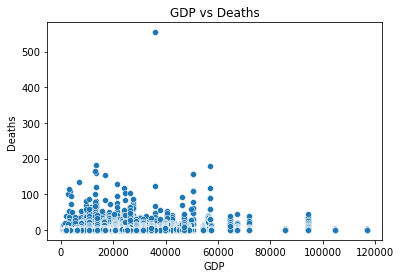

In [80]:
sns.scatterplot(data = cov, x = 'gdp_per_capita', y='new_deaths_per_million') 
plt.title('GDP vs Deaths')  
plt.xlabel('GDP')  
plt.ylabel('Deaths')  
plt.show()

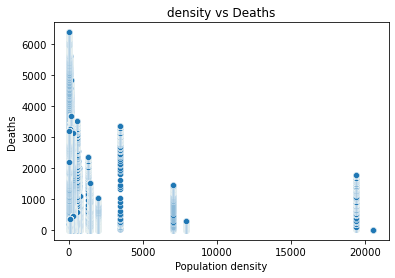

In [122]:
sns.scatterplot(data = cov, x = 'population_density', y='total_deaths_per_million') 
plt.title('density vs Deaths')  
plt.xlabel('Population density')  
plt.ylabel('Deaths')  
plt.show()

pop density = no
GDP = maybe?
HDI = interesting?
hospital beds = maybe?

In [81]:
regres_1 = cov.loc[(cov['gdp_per_capita'].isnull() == False) & (cov['new_deaths_per_million'].isnull()
                                                                == False)]

In [83]:
regres_1['gdp_per_capita'].isnull().value_counts()

False    176003
Name: gdp_per_capita, dtype: int64

In [88]:
regres_1['new_deaths_per_million'].isnull().value_counts()

False    176003
Name: new_deaths_per_million, dtype: int64

In [92]:
# Reshape the variables into NumPy arrays and put them into separate objects.
x = regres_1['gdp_per_capita'].values.reshape(-1,1)
y = regres_1['new_deaths_per_million'].values.reshape(-1,1)

In [90]:
x

array([[1803.987],
       [1803.987],
       [1803.987],
       ...,
       [1899.775],
       [1899.775],
       [1899.775]])

In [91]:
np.mean(x)

19544.235732231842

In [93]:
y

array([[0.024],
       [0.   ],
       [0.   ],
       ...,
       [0.   ],
       [0.   ],
       [0.858]])

In [94]:
np.mean(y)

1.3340245166275573

### Regression calculation

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [96]:
# Create a regression object.
# This is the regression object, which will be fit onto the training set.
regression = LinearRegression()

In [97]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [98]:
# Predict the values of y using X.

y_predicted = regression.predict(x_test)

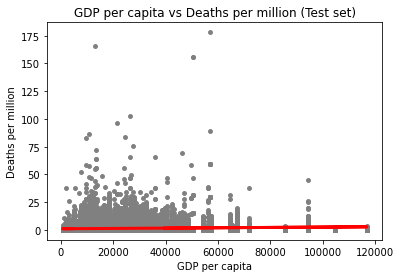

In [99]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Deaths per million (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Deaths per million')
plot_test.show()

In [100]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [101]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.49488897e-05]]
Mean squared error:  15.012696789502957
R2 score:  0.006946109385705168


I ran this with both total deaths/mil and with new. Neither seemed to be predictable based on GDP.

This is a complex process, so I'm not expecting massively correlated and predictive individual variables. But it's surprising that there appears to be almost nothing to do with anything.

### Regression 2 - cases and tests

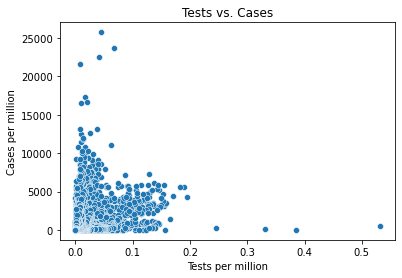

In [102]:
sns.scatterplot(data = cov, x = (cov['new_tests_per_thousand']/1000), y='new_cases_per_million') 
plt.title('Tests vs. Cases')  
plt.xlabel('Tests per million')  
plt.ylabel('Cases per million')  
plt.show()

In [103]:
test2 = cov.loc[(cov['new_tests_per_thousand'].isnull() == False) & 
(cov['new_cases_per_million'].isnull() == False)]

In [104]:
# Reshape the variables into NumPy arrays and put them into separate objects.

a = test2['new_tests_per_thousand'].values.reshape(-1,1)
b = test2['new_cases_per_million'].values.reshape(-1,1)

In [105]:
# Split data into a training set and a test set.

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=0)

In [107]:
# Fit the regression object onto the training set.

regression.fit(a_train, b_train)

LinearRegression()

In [108]:
# Predict the values of y using X.

b_predicted = regression.predict(a_test)

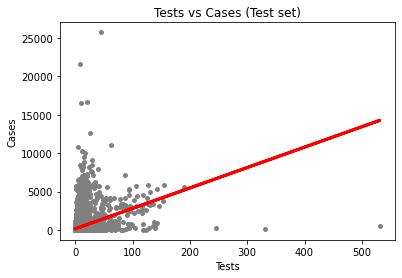

In [109]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(a_test, b_test, color='gray', s = 15)
plot_test.plot(a_test, b_predicted, color='red', linewidth =3)
plot_test.title('Tests vs Cases (Test set)')
plot_test.xlabel('Tests')
plot_test.ylabel('Cases')
plot_test.show()

In [110]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(b_test, b_predicted) # This is the mean squared error
r2 = r2_score(b_test, b_predicted) # This is the R2 score. 

In [111]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[26.57224699]]
Mean squared error:  453295.68743977905
R2 score:  0.09411153803883243


Again, this was run with total/mil and new/mil. It *looks* like a strong slope, but there are some significant outliers and overall tests aren't predictive of cases.

Which is strange when you think about it since tests are required to confirm cases, but there may be a time delay if data is reported daily since tests usually take at least 2 days to process

### Regression 3 Cases and deaths

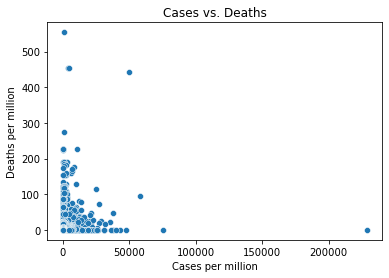

In [112]:
sns.scatterplot(data = cov, x = cov['new_cases_per_million'], y='new_deaths_per_million') 
plt.title('Cases vs. Deaths')  
plt.xlabel('Cases per million')  
plt.ylabel('Deaths per million')  
plt.show()

In [113]:
reg3 = cov.loc[(cov['new_cases_per_million'].isnull() == False) & 
(cov['new_deaths_per_million'].isnull() == False)]

In [114]:
# Reshape the variables into NumPy arrays and put them into separate objects.

c = reg3['new_cases_per_million'].values.reshape(-1,1)
d = reg3['new_deaths_per_million'].values.reshape(-1,1)

In [115]:
# Split data into a training set and a test set.

c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.3, random_state=0)

In [116]:
# Fit the regression object onto the training set.

regression.fit(c_train, d_train)

LinearRegression()

In [117]:
# Predict the values of y using X.

d_predicted = regression.predict(c_test)

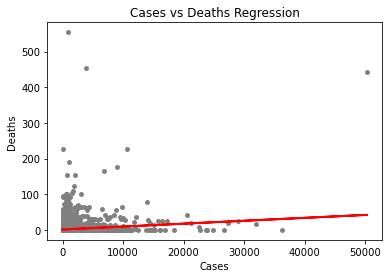

In [118]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(c_test, d_test, color='gray', s = 15)
plot_test.plot(c_test, d_predicted, color='red', linewidth =2)
plot_test.title('Cases vs Deaths Regression')
plot_test.xlabel('Cases')
plot_test.ylabel('Deaths')
plot_test.show()

In [119]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(c_test, d_predicted) # This is the mean squared error
r2 = r2_score(d_test, d_predicted) # This is the R2 score. 

In [120]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00081657]]
Mean squared error:  666315.4047599293
R2 score:  0.051406099651906234


Total/mil: r2 of 0.35  
New/mil: r2 of 0.05  

It is very difficult to predict new deaths, even with new cases as the independent variable. I'm not really sure what to try next to find anything useful to say with this data.